<a href="https://colab.research.google.com/github/mia19reynolds/MalariaImageClassification/blob/main/malaria_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Artificial Intelligence Coursework**
##  **Detecting Malaria Infected Cells with Convolutional Neural Networks - Binary Classification**


## **1 Introduction**


In this study, I investigate deep learning models for the binary classification task of detecting malaria infected cells from images using Convolutional Neural Networks (CNNs). The following models have been built using the TensorFlow framework. Structuring the investigation around the topics I have learnt from this term, I explored and implemented several network architectures, parameter tuning, droupouts, early stopping, learning rate optimizer etc. I built on my initial model with the intention to improve model generalisation.

## **2 Technologies Stack**

All of the following models have been built and trained using the TensorFlow framework (Python), within Google Colab environment.

### **Imports**


In [ ]:
import os
import shutil
import pathlib
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## **3 Setting up and Preparing the Data**

The following dataset was used to train, validate and then test the models.

www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria

The dataset contains two 27,558 images that have been split into two classes - Parasitized and Uninfected.

To use this dataset I loaded it from kaggle and stored it on my google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/ColabNotebooks/kaggle_api_creds/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download iarunava/cell-images-for-detecting-malaria

Dataset URL: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria
License(s): unknown
100% 674M/675M [00:02<00:00, 267MB/s]
100% 675M/675M [00:02<00:00, 247MB/s]


In [ ]:
! unzip cell-images-for-detecting-malaria.zip

Here I split the data set into training, validation and testing - 70:15:15.

The folder structure was as follows:

cell_images:

* malaria_small

    * test
      *   Parasitized
      *   Uninfected

    * train
      *   Parasitized
      *   Uninfected

    * validation
      *   Parasitized
      *   Uninfected


In total there was 19200 training images, 4132 validation images and 4136 testing images.

In [ ]:
import os
import shutil
import pathlib
import random


DATASET_DIR = pathlib.Path("cell_images")
ORIG_PARASITIZED_DIR = DATASET_DIR / "Parasitized"
ORIG_UNINFECTED_DIR = DATASET_DIR / "Uninfected"
SMALL_DS_DIR = DATASET_DIR / "malaria_small"  # New directory for the split data

def create_dirs():
    for subset in ["train", "validation", "test"]:
        for category in ["Parasitized", "Uninfected"]:
            os.makedirs(SMALL_DS_DIR / subset / category, exist_ok=True)

def split_and_copy_images(subset_name, image_list, category):
    small_dir = SMALL_DS_DIR / subset_name / category
    # Move files to subfolders
    for fname in image_list:
        shutil.copyfile(src=(ORIG_PARASITIZED_DIR if category == "Parasitized" else ORIG_UNINFECTED_DIR) / fname,
                        dst=small_dir / fname)
    print(f"Copied {len(image_list)} {category} images to {small_dir}")

# Number of images for each set
total_images_per_category = 13779
train_size = int(0.7 * total_images_per_category)  # 70%
validation_size = int(0.15 * total_images_per_category)  # 15%
test_size = int(0.15 * total_images_per_category)  # 15%


create_dirs()

def split_dataset():
    # All the images in the Parasitized and Uninfected folders
    parasitized_images = [f for f in os.listdir(ORIG_PARASITIZED_DIR) if f.endswith('.png')]
    uninfected_images = [f for f in os.listdir(ORIG_UNINFECTED_DIR) if f.endswith('.png')]

    random.shuffle(parasitized_images)
    random.shuffle(uninfected_images)

    # Split the images
    parasitized_train = parasitized_images[:train_size]  # 70% for training
    parasitized_val = parasitized_images[train_size:train_size + validation_size]  # 15% for validation
    parasitized_test = parasitized_images[train_size + validation_size:]  # 15% for test

    uninfected_train = uninfected_images[:train_size]  # 70% for training
    uninfected_val = uninfected_images[train_size:train_size + validation_size]  # 15% for validation
    uninfected_test = uninfected_images[train_size + validation_size:]  # 15% for test

    # Train set
    split_and_copy_images("train", parasitized_train, "Parasitized")
    split_and_copy_images("train", uninfected_train, "Uninfected")

    # Validation set
    split_and_copy_images("validation", parasitized_val, "Parasitized")
    split_and_copy_images("validation", uninfected_val, "Uninfected")

    # Test set
    split_and_copy_images("test", parasitized_test, "Parasitized")
    split_and_copy_images("test", uninfected_test, "Uninfected")


split_dataset()

print("-" * 40)
print('Total training Parasitized images:', len(os.listdir(SMALL_DS_DIR / "train" / "Parasitized")))
print('Total training Uninfected images:', len(os.listdir(SMALL_DS_DIR / "train" / "Uninfected")))
print('Total validation Parasitized images:', len(os.listdir(SMALL_DS_DIR / "validation" / "Parasitized")))
print('Total validation Uninfected images:', len(os.listdir(SMALL_DS_DIR / "validation" / "Uninfected")))
print('Total test Parasitized images:', len(os.listdir(SMALL_DS_DIR / "test" / "Parasitized")))
print('Total test Uninfected images:', len(os.listdir(SMALL_DS_DIR / "test" / "Uninfected")))


Copied 9645 Parasitized images to cell_images/malaria_small/train/Parasitized
Copied 9645 Uninfected images to cell_images/malaria_small/train/Uninfected
Copied 2066 Parasitized images to cell_images/malaria_small/validation/Parasitized
Copied 2066 Uninfected images to cell_images/malaria_small/validation/Uninfected
Copied 2068 Parasitized images to cell_images/malaria_small/test/Parasitized
Copied 2068 Uninfected images to cell_images/malaria_small/test/Uninfected
----------------------------------------
Total training Parasitized images: 9645
Total training Uninfected images: 9645
Total validation Parasitized images: 2066
Total validation Uninfected images: 2066
Total test Parasitized images: 2068
Total test Uninfected images: 2068


In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    SMALL_DS_DIR / "train",
    image_size=(150, 150),  # Resize all images
    batch_size=32,  # Images per batch
    label_mode='binary'
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    SMALL_DS_DIR / "validation",
    image_size=(150, 150),  # Resize all images
    batch_size=32,
    label_mode='binary'
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    SMALL_DS_DIR / "test",
    image_size=(150, 150),
    batch_size=32,
    label_mode='binary'
)

print("Train dataset")
print(train_dataset)

print("Validation dataset")
print(validation_dataset)

print("Test dataset")
print(test_dataset)


Found 19290 files belonging to 2 classes.
Found 4132 files belonging to 2 classes.
Found 4136 files belonging to 2 classes.
Train dataset
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>
Validation dataset
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>
Test dataset
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>


## **4 Display Classified Images**

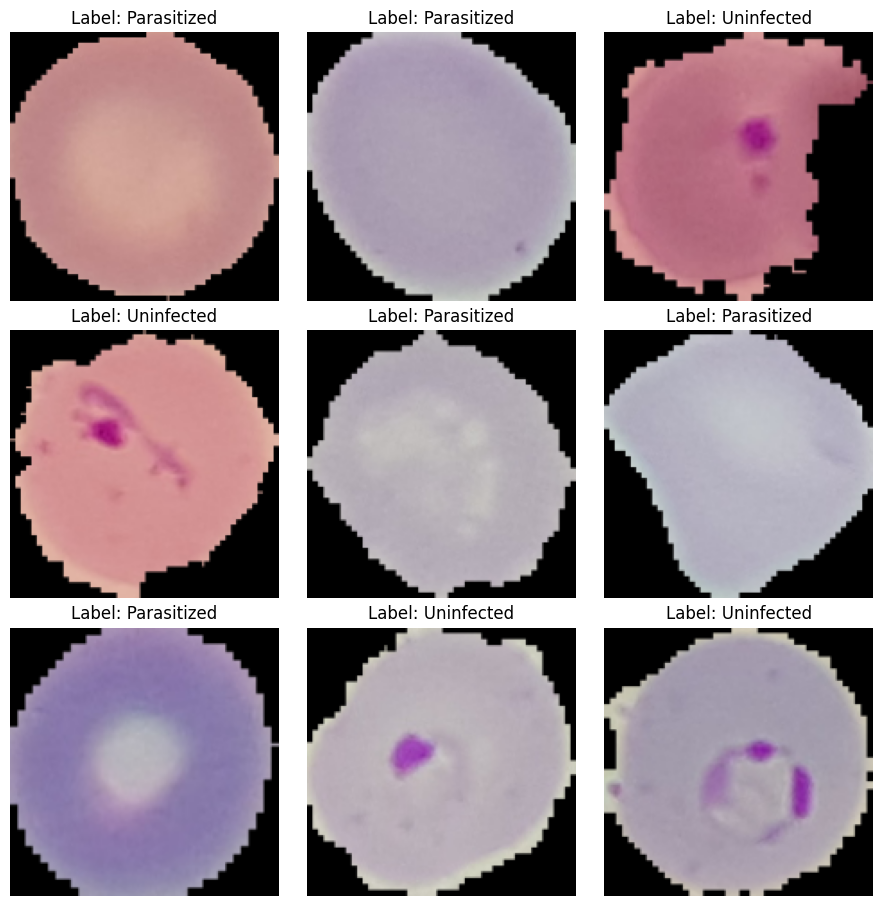

In [ ]:
# Load a batch of images from the train dataset
image_batch, label_batch = next(iter(train_dataset))
num_images_to_display = 9

# Create a 3x3 grid for displaying images
plt.figure(figsize=(9, 9))
for i in range(num_images_to_display):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(f"Label: {'Parasitized' if label_batch[i].numpy() == 1 else 'Uninfected'}")
    plt.axis("off")
plt.tight_layout(pad=0.5)
plt.show()


## **5 Establishing a Common Sense Baseline**



To begin, I built a non-neural baseline that shows an accuracy of 50% as the dataset is evenly split - giving a probability of 0.5 for each classification.

In [ ]:
prob_infected = 0.5
prob_uninfected = 0.5

"Common sense baseline: " + str(prob_uninfected /(prob_infected + prob_uninfected)*100) +  "%"

'Common sense baseline: 50.0%'

I built a very simple CNN model to establish a neural common sense baseline which gave me a test accuracy of 52%. This seems reasonable as there are only two classes for the model to choose from with equal probability.

In [ ]:
# check commonsense baseline
# build
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# compile model
model.compile( optimizer='Adam',
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

result= model.evaluate(test_dataset)
# without training's accuracy
print(f'Test Accuracy: {result[1]}')

130/130 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.5330 - loss: 30.9807
Test Accuracy: 0.530705988407135


## **6 Saving the Best Model**

In [ ]:
def train_model(model, model_number, num_of_epochs):

  model_filepath = f'best_model/best_model_{model_number}.keras'

  checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_filepath,
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    mode='max',
    verbose=1)


  history = model.fit(train_dataset,
    epochs=num_of_epochs,
    validation_data=validation_dataset,
    callbacks= [checkpoint_callback]
  )

  return history

## **7 Practical Investigation of Models**

### Graphs for models evaluation

In [ ]:
def plot_history(history):

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(accuracy) + 1)

    fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, constrained_layout=True, figsize=(10,3))

    ax1.plot(epochs, accuracy,label="Training accuracy")
    ax1.plot(epochs, val_accuracy, label="Validation accuracy")
    ax1.set_title("Training and validation accuracy")
    ax1.legend()

    ax2.plot(epochs, loss,  label="Training loss")
    ax2.plot(epochs, val_loss,  label="Validation loss")
    ax2.set_title("Training and validation loss")
    ax2.legend()
    plt.show()

### **Model 1: Basic Model that Performs Better than Baseline**

The basic structure of a convolutional neural network is as follows


*   Input Layer
*   Convolutional Layer
*   Pooling Layer
*   Flatten Layer
*   Fully Connected Dense Layer
*   Output Layer







In [ ]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))  # First convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')) # Second convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer

model.add(tf.keras.layers.Flatten()) # Flatten the output from the convolutional layers
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Output layer (binary classification)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          41,473 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,561 (181.88 KB)

 Trainable params: 46,561 (181.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_1 = train_model(model,'1', 10)

Epoch 1/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5683 - loss: 23.0252
Epoch 1: val_accuracy improved from -inf to 0.61713, saving model to best_model/best_model_1.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 30s 42ms/step - accuracy: 0.5684 - loss: 22.9957 - val_accuracy: 0.6171 - val_loss: 0.6564
Epoch 2/10
602/603 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6834 - loss: 0.5936
Epoch 2: val_accuracy improved from 0.61713 to 0.65465, saving model to best_model/best_model_1.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 33s 34ms/step - accuracy: 0.6834 - loss: 0.5936 - val_accuracy: 0.6546 - val_loss: 0.6389
Epoch 3/10
602/603 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7280 - loss: 0.5434
Epoch 3: val_accuracy improved from 0.65465 to 0.70232, saving model to best_model/best_model_1.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.7280 - loss: 0.5434 - val_accuracy: 0.7023 - val_loss: 0.6164
Epoch 4/10
601/603 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7691 - los

### **Model 1 Evaluation**


This model performs much better than the baselines I outlined at the beginning. However, when we look at the training accuracy vs validation accuracy we can see there is clear signs of overfitting (the model performs very well on the training data but performs very badly on the validation data). Therefor this model would not perform well on unseen test data.

It could be argued that this model has the ability to perform better if ran for more epochs as it reached its best validation accuracy in the final epoch.


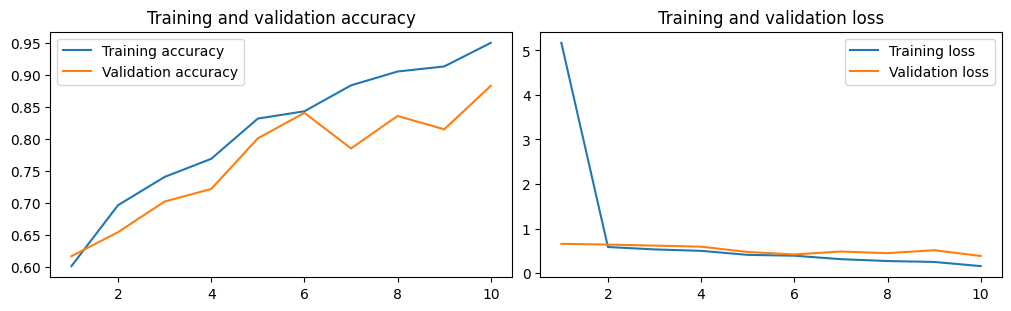

In [ ]:
plot_history(model_1)

In [ ]:
best_val_accuracy = max(model_1.history['val_accuracy'])
print("Best Validation Accuracy:", best_val_accuracy)

Best Validation Accuracy: 0.8826234340667725


### **Model 2: 2 Convolutional layers (16, 32)**

Here I increased the number of filters in my convolutional layers. This does not directly combat the issue we saw with overfitting from **Model 1**, however I wanted to see if this architecture would better help the model improve generalisation.

In [ ]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))  # First convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')) # Second convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer

model.add(tf.keras.layers.Flatten()) # Flatten the output from the convolutional layers
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Output layer

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          41,473 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,561 (181.88 KB)

 Trainable params: 46,561 (181.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_2 = train_model(model,'2', 10)

Epoch 1/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5526 - loss: 26.9599
Epoch 1: val_accuracy improved from -inf to 0.60987, saving model to best_model/best_model_2.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.5526 - loss: 26.9252 - val_accuracy: 0.6099 - val_loss: 0.6625
Epoch 2/10
601/603 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6262 - loss: 0.6451
Epoch 2: val_accuracy improved from 0.60987 to 0.62028, saving model to best_model/best_model_2.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 25s 42ms/step - accuracy: 0.6262 - loss: 0.6451 - val_accuracy: 0.6203 - val_loss: 0.6671
Epoch 3/10
601/603 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6553 - loss: 0.6161
Epoch 3: val_accuracy did not improve from 0.62028
603/603 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.6553 - loss: 0.6161 - val_accuracy: 0.6135 - val_loss: 0.6771
Epoch 4/10
602/603 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6774 - loss: 0.5920
Epoch 4: val_accuracy improved from 0.620

### **Model 2 Evaluation**

Here we can see that validation accuracy of **Model 2** has further decreased from **Model 1's** validation accuracy and the increase of filters without appropriate support from regularisation etc has not helped the models overfitting.

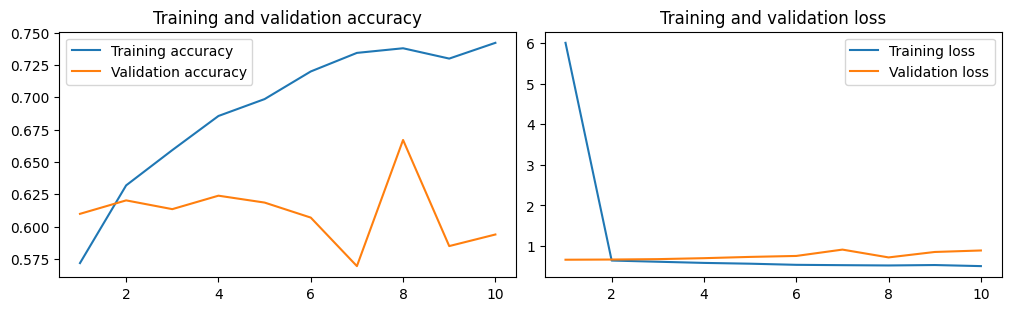

In [ ]:
plot_history(model_2)

In [ ]:
best_val_accuracy = max(model_2.history['val_accuracy'])
print("Best Validation Accuracy:", best_val_accuracy)

Best Validation Accuracy: 0.6669893264770508


### **Model 3: Adding an additional convolutional layer**

Here I implement an additional convolutional layer to see if an increase in depth will allow the model to capture more abstract patterns - allowing it to better generalise.

This is also common practice when developing CNNs.

In [ ]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))  # First convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')) # Second convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')) # Third convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer

model.add(tf.keras.layers.Flatten()) # Flatten the output from the convolutional layers
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Output layer

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          18,497 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,081 (164.38 KB)

 Trainable params: 42,081 (164.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_3 = train_model(model,'3', 15)

Epoch 1/15
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5928 - loss: 3.7033
Epoch 1: val_accuracy improved from -inf to 0.67425, saving model to best_model/best_model_3.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 28s 42ms/step - accuracy: 0.5928 - loss: 3.6992 - val_accuracy: 0.6742 - val_loss: 0.6301
Epoch 2/15
601/603 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6926 - loss: 0.5908
Epoch 2: val_accuracy improved from 0.67425 to 0.79017, saving model to best_model/best_model_3.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.6927 - loss: 0.5907 - val_accuracy: 0.7902 - val_loss: 0.4651
Epoch 3/15
602/603 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8196 - loss: 0.4354
Epoch 3: val_accuracy improved from 0.79017 to 0.92110, saving model to best_model/best_model_3.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.8197 - loss: 0.4352 - val_accuracy: 0.9211 - val_loss: 0.2203
Epoch 4/15
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9380 - loss:

### **Model 3 Evaluation**

Here we can see that the addition of another convolutional layer has increased the validation accuracy of our model.

We can still see that our model is performing better on training data than it is on validation data, however from the graphs below we can see training and validation accuracy are much closer than before, meaning there is less overfitting present but much less.

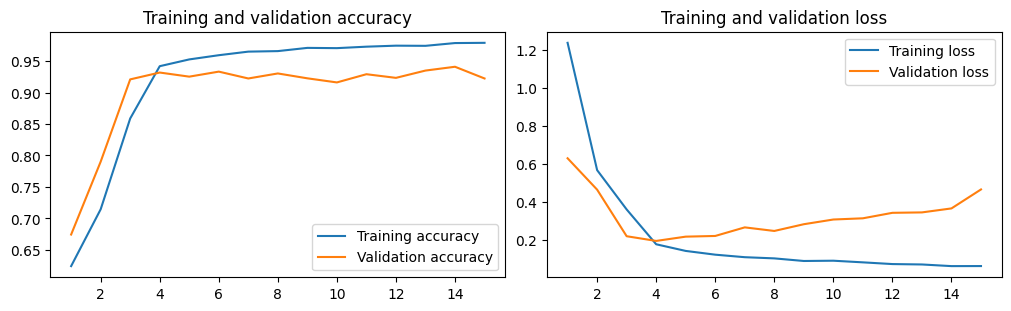

In [ ]:
plot_history(model_3)

In [ ]:
best_val_accuracy = max(model_3.history['val_accuracy'])
print("Best Validation Accuracy:", best_val_accuracy)

Best Validation Accuracy: 0.9411907196044922


### **Model 4: Introduction of fully connected dense**

Aiming to improve the models ability to recognise more complex patterns and hopefully increase the models validation accuracy, I added a fully connected dense layer to allow the model to learn non-linearly.

In [ ]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))  # First convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')) # Second convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')) # Third convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer

model.add(tf.keras.layers.Flatten()) # Flatten the output from the convolutional layers
model.add(tf.keras.layers.Dense(32, activation='relu')) # Fully connected layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Output layer

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         591,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 615,521 (2.35 MB)

 Trainable params: 615,521 (2.35 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_4 = train_model(model,'4', 15)

Epoch 1/15
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5879 - loss: 3.1550
Epoch 1: val_accuracy improved from -inf to 0.74250, saving model to best_model/best_model_4.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - accuracy: 0.5879 - loss: 3.1516 - val_accuracy: 0.7425 - val_loss: 0.5150
Epoch 2/15
601/603 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7800 - loss: 0.4684
Epoch 2: val_accuracy improved from 0.74250 to 0.94119, saving model to best_model/best_model_4.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 37s 36ms/step - accuracy: 0.7804 - loss: 0.4678 - val_accuracy: 0.9412 - val_loss: 0.1734
Epoch 3/15
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9488 - loss: 0.1501
Epoch 3: val_accuracy improved from 0.94119 to 0.94676, saving model to best_model/best_model_4.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - accuracy: 0.9488 - loss: 0.1501 - val_accuracy: 0.9468 - val_loss: 0.1644
Epoch 4/15
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9641 - loss:

### **Model 4 Evaluation**

Here we can see that the implementation of a fully connected Relu layer has slightly increased the models validation accuracy from the previous model. Although small this implementation has had a positive impact on the models ability and might be more important when introducing the model to unseen data.

Again, there are still signs of overfitting similar to **Modle 3**.

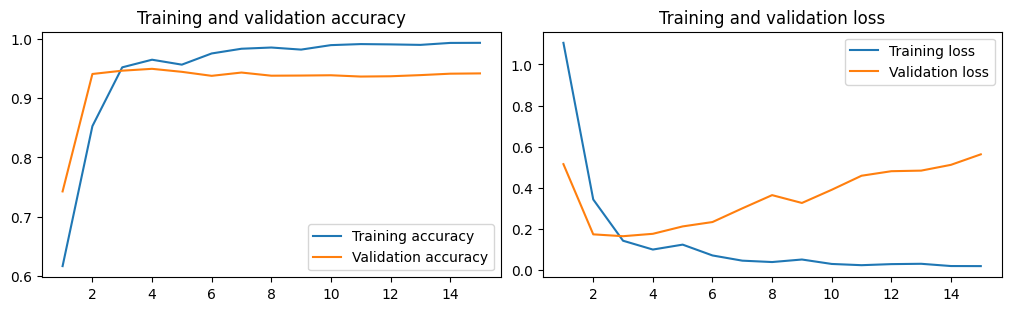

In [ ]:
plot_history(model_4)

In [ ]:
best_val_accuracy = max(model_4.history['val_accuracy'])
print("Best Validation Accuracy:", best_val_accuracy)

Best Validation Accuracy: 0.9499031901359558


### **Model 5: Adding Dropout**

The development of the previous models are clearly affected by overfitting. Here, I have implemented dropout to this model to force the model to not rely too heavily on any single neuron - encouraging generalisation instead of learning the training data which should decrease the present overfitting.

In [ ]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))  # First convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')) # Second convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')) # Third convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer

model.add(tf.keras.layers.Flatten()) # Flatten the output from the convolutional layers
model.add(tf.keras.layers.Dense(64, activation='relu')) # Fully connected layer
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Output layer

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,183,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,207,457 (4.61 MB)

 Trainable params: 1,207,457 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_5 = train_model(model, '5', 20)

Epoch 1/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5525 - loss: 6.2911
Epoch 1: val_accuracy improved from -inf to 0.63214, saving model to best_model/best_model_5.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - accuracy: 0.5526 - loss: 6.2835 - val_accuracy: 0.6321 - val_loss: 0.6499
Epoch 2/20
602/603 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6220 - loss: 0.6526
Epoch 2: val_accuracy improved from 0.63214 to 0.64376, saving model to best_model/best_model_5.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.6220 - loss: 0.6526 - val_accuracy: 0.6438 - val_loss: 0.6342
Epoch 3/20
602/603 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6391 - loss: 0.6333
Epoch 3: val_accuracy improved from 0.64376 to 0.65102, saving model to best_model/best_model_5.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.6391 - loss: 0.6332 - val_accuracy: 0.6510 - val_loss: 0.6317
Epoch 4/20
601/603 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6548 - loss:

### **Model 5 Evaluation**

Here we can see the implementation of dropout has increased the validation accuracy slightly from **Model 4**, this may seem nominal but once other regulization techniques are implented they will work together to further increase validation accuracy and combat overfitting.

Although overfitting is still present by the end of the run of all epochs, we can see that around epoch 10 there is minimal to no overfitting and the model might benefit form early stopping.

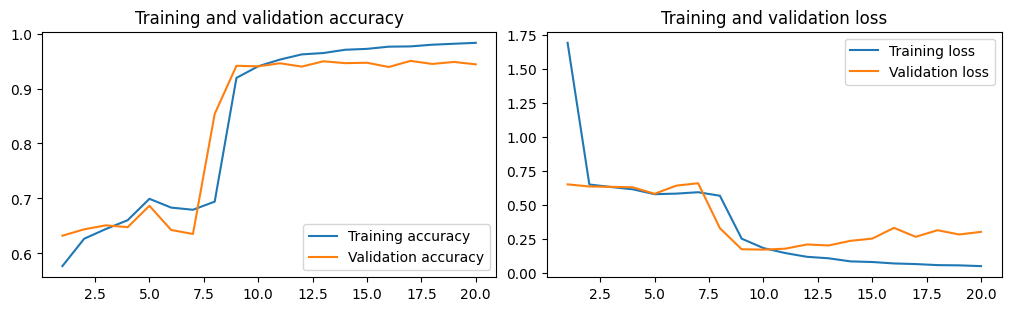

In [ ]:
plot_history(model_5)

In [ ]:
best_val_accuracy = max(model_5.history['val_accuracy'])
print("Best Validation Accuracy:", best_val_accuracy)

Best Validation Accuracy: 0.9503872394561768


### **Model 6: Adding L2 Regularization**

Another proven method to decrease overfitting is L2 Regularization. It discourages large weights in the model to discourage the model from memorising the training data.

The implentation of both the drop out and L2 Regularization should combat overfitting from different perspectives.

In [ ]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))  # First convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')) # Second convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))) # Third convolutional layer with L2
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer

model.add(tf.keras.layers.Flatten()) # Flatten the output from the convolutional layers
model.add(tf.keras.layers.Dense(64, activation='relu')) # Fully connected layer
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Output layer

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,183,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,207,457 (4.61 MB)

 Trainable params: 1,207,457 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_6 = train_model(model, '6', 15)

Epoch 1/15
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6014 - loss: 3.4310
Epoch 1: val_accuracy improved from -inf to 0.63311, saving model to best_model/best_model_6.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 40s 57ms/step - accuracy: 0.6014 - loss: 3.4273 - val_accuracy: 0.6331 - val_loss: 0.6808
Epoch 2/15
602/603 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6298 - loss: 0.6846
Epoch 2: val_accuracy improved from 0.63311 to 0.79090, saving model to best_model/best_model_6.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.6299 - loss: 0.6846 - val_accuracy: 0.7909 - val_loss: 0.4850
Epoch 3/15
601/603 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8764 - loss: 0.3990
Epoch 3: val_accuracy improved from 0.79090 to 0.94313, saving model to best_model/best_model_6.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.8765 - loss: 0.3986 - val_accuracy: 0.9431 - val_loss: 0.1942
Epoch 4/15
602/603 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9423 - loss:

### **Model 6 Evaluation**

Here we can see again that the implentation of regularization techniques improves the model in what may seem like a small way (0.001), however as we can see from these graphs, the difference between the training and validation accuracy throughout the epochs are the smallest we have seen so far in this experiment out of all the models. Showing our current structure is combatting overfitting the most succesfully so far.

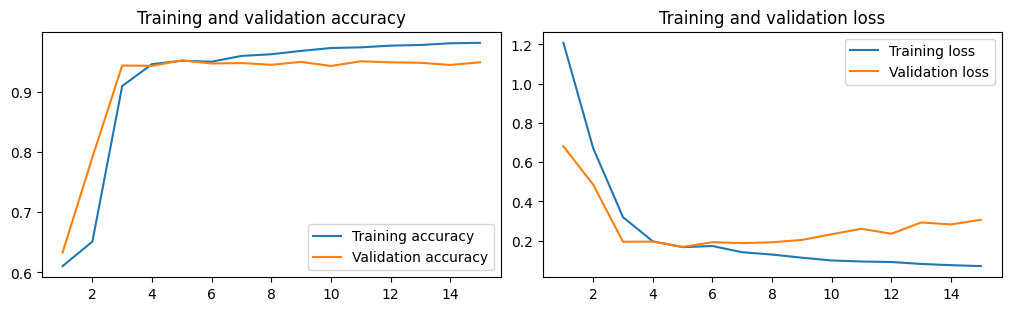

In [ ]:
plot_history(model_6)

In [ ]:
best_val_accuracy = max(model_6.history['val_accuracy'])
print("Best Validation Accuracy:", best_val_accuracy)

Best Validation Accuracy: 0.951597273349762


### **Model 7: Applying less harsh regularisation**

As we have established and demonstrated a good balance between training and validation accuracy in **Model 6**, here you will see me explore using a less harsh regularisation by dropping the L2 regularization from 0.001 to 0.0001. By doing this we lessen the restriction applied to the model to learn complex patterns.

In [ ]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))  # First convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')) # Second convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001))) # Third convolutional layer with L2
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer

model.add(tf.keras.layers.Flatten()) # Flatten the output from the convolutional layers
model.add(tf.keras.layers.Dense(64, activation='relu')) # Fully connected layer
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Output layer

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,183,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,207,457 (4.61 MB)

 Trainable params: 1,207,457 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_7 = train_model(model, '7', 15)

Epoch 1/15
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5440 - loss: 5.5165
Epoch 1: val_accuracy improved from -inf to 0.49976, saving model to best_model/best_model_7.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 28s 42ms/step - accuracy: 0.5440 - loss: 5.5100 - val_accuracy: 0.4998 - val_loss: 0.6767
Epoch 2/15
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6049 - loss: 0.6568
Epoch 2: val_accuracy improved from 0.49976 to 0.92352, saving model to best_model/best_model_7.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 37s 38ms/step - accuracy: 0.6050 - loss: 0.6567 - val_accuracy: 0.9235 - val_loss: 0.2690
Epoch 3/15
602/603 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9210 - loss: 0.2753
Epoch 3: val_accuracy improved from 0.92352 to 0.94773, saving model to best_model/best_model_7.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.9211 - loss: 0.2752 - val_accuracy: 0.9477 - val_loss: 0.1509
Epoch 4/15
602/603 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9458 - loss:

### **Model 7 Evaluation**

Here we can see that this resulted in slightly better results of validation accuracy than with a higher L2 regularization.

However the graphs below show that it did not drastically effect the models overfitting as we set out to do - the training and validation accuracy remain similar to the last model.

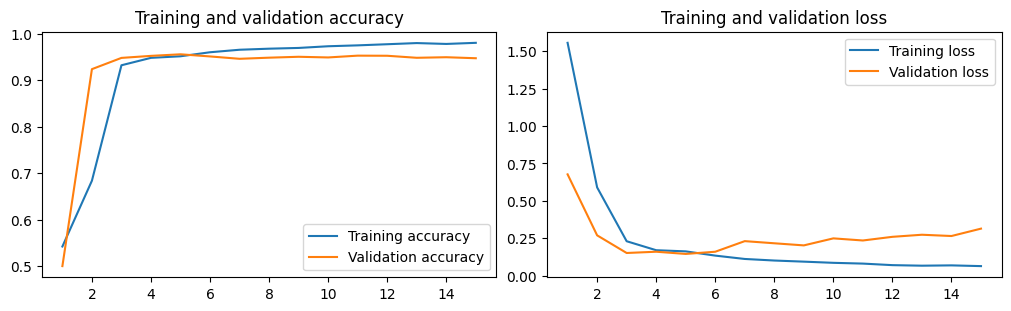

In [ ]:
plot_history(model_7)

In [ ]:
best_val_accuracy = max(model_7.history['val_accuracy'])
print("Best Validation Accuracy:", best_val_accuracy)

Best Validation Accuracy: 0.9554694890975952


### **Model 8: Adding Batch Normalization**

Here I implement batch normalization onto all my layers to help stabilize the model and speed up training. It should help the models filters to learn features mroe effectively without being disrupted by large changes in the input distributions.

Here I have also increase the L2 regularization back to 0.001.

In [ ]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))  # First convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')) # Second convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))) # Third convolutional layer with L2
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten()) # Flatten the output from the convolutional layers
model.add(tf.keras.layers.Dense(64, activation='relu')) # Fully connected layer
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Output layer

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 74, 74, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 36, 36, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 17, 17, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,183,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,207,905 (4.61 MB)

 Trainable params: 1,207,681 (4.61 MB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
model_8 = train_model(model, '8', 15)

Epoch 1/15
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5973 - loss: 0.8160
Epoch 1: val_accuracy improved from -inf to 0.55663, saving model to best_model/best_model_8.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 39s 53ms/step - accuracy: 0.5973 - loss: 0.8158 - val_accuracy: 0.5566 - val_loss: 0.8113
Epoch 2/15
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8314 - loss: 0.4255
Epoch 2: val_accuracy improved from 0.55663 to 0.94385, saving model to best_model/best_model_8.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.8315 - loss: 0.4255 - val_accuracy: 0.9439 - val_loss: 0.2284
Epoch 3/15
602/603 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9206 - loss: 0.2675
Epoch 3: val_accuracy improved from 0.94385 to 0.94869, saving model to best_model/best_model_8.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 43s 42ms/step - accuracy: 0.9206 - loss: 0.2675 - val_accuracy: 0.9487 - val_loss: 0.1812
Epoch 4/15
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9345 - loss:

### **Model 8 Evaluation**

Here we can see that the implementation of batch normalization has given similar results to **Model 6 and 7's** validation acccuracy, another subtle but important increase from **Model 6**. By the end of the 15 epochs the training and validation accuracy were nearly equal showing the model has minimal overfitting, is well regularized and can generalize well to unseen data.

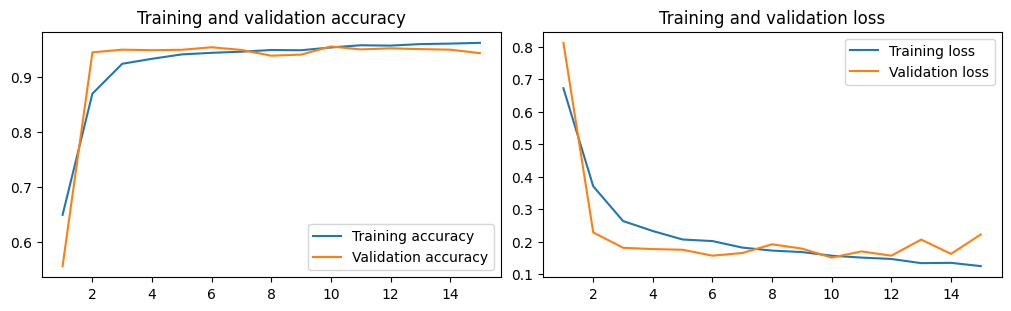

In [ ]:
plot_history(model_8)

In [ ]:
best_val_accuracy = max(model_8.history['val_accuracy'])
print("Best Validation Accuracy:", best_val_accuracy)

Best Validation Accuracy: 0.9545014500617981


### **Model 9: Implement Early Stopping**

Now that I have nominal overfitting being displayed in **Model 8**, I have implemented early stopping to investigate optimal epochs for my model.

In [ ]:
def earlystopping_train_model(model, model_number, num_of_epochs):
  # Define a unique filepath for each model by including model_number
  model_filepath = f'best_model_{model_number}.keras'

  earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=5, verbose=1, mode='auto')
  checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_filepath,
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    mode='max',
    verbose=1)
  checkpoint_callback = [earlystopping, checkpoint]


  history = model.fit(train_dataset,
    epochs=num_of_epochs,
    validation_data=validation_dataset,
    callbacks= checkpoint_callback
  )

  return history

In [ ]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))  # First convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')) # Second convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))) # Third convolutional layer with L2
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten()) # Flatten the output from the convolutional layers
model.add(tf.keras.layers.Dense(64, activation='relu')) # Fully connected layer
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Output layer

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 74, 74, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 36, 36, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 17, 17, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,183,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,207,905 (4.61 MB)

 Trainable params: 1,207,681 (4.61 MB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
model_9 = earlystopping_train_model(model, '9', 20)

Epoch 1/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6029 - loss: 0.9558
Epoch 1: val_accuracy improved from -inf to 0.50194, saving model to best_model_9.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.6029 - loss: 0.9554 - val_accuracy: 0.5019 - val_loss: 1.5813
Epoch 2/20
602/603 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7720 - loss: 0.4656
Epoch 2: val_accuracy improved from 0.50194 to 0.93272, saving model to best_model_9.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 36s 39ms/step - accuracy: 0.7722 - loss: 0.4654 - val_accuracy: 0.9327 - val_loss: 0.2466
Epoch 3/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9114 - loss: 0.2872
Epoch 3: val_accuracy did not improve from 0.93272
603/603 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.9114 - loss: 0.2872 - val_accuracy: 0.8945 - val_loss: 0.3394
Epoch 4/20
602/603 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9274 - loss: 0.2561
Epoch 4: val_accuracy did not improve from 0.93272
603/603 ━━━━━━

### **Model 9 Evaluation**

Here we can see that the implementation of early stopping has actually decreased our validation accuracy very slightly from 0.955 in **Model 7** to 0.9439. Although nominal, it could be argued that this model has better generalisation potential as early stopping is implemented to directly combat overfitting.

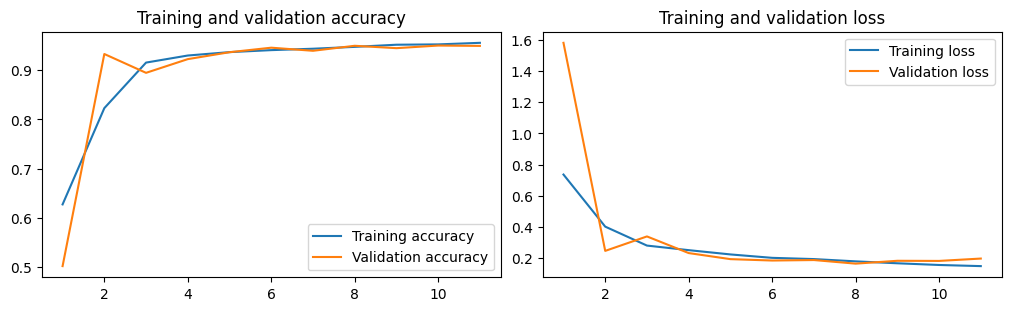

In [ ]:
plot_history(model_9)

In [ ]:
best_val_accuracy = max(model_9.history['val_accuracy'])
print("Best Validation Accuracy:", best_val_accuracy)

Best Validation Accuracy: 0.9499031901359558


### **Model 10: Adding Learning Rate**

Here I add a learning rate to control the speed the model is learning at - aiming to minimise the loss of the model. It should encourage the model to make more meaningful adjustments while training. I have decreased the learning rate from adams default 0.001 to 0.0005. This should prevent the model from overshooting while still letting it improve.

In [ ]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))  # First convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')) # Second convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))) # Third convolutional layer with L2
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten()) # Flatten the output from the convolutional layers
model.add(tf.keras.layers.Dense(64, activation='relu')) # Fully connected layer
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Output layer

model.compile(tf.keras.optimizers.Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy']) # Specified learning rate

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 74, 74, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 36, 36, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 17, 17, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,183,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,207,905 (4.61 MB)

 Trainable params: 1,207,681 (4.61 MB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
model_10 = earlystopping_train_model(model, '10', 20)

Epoch 1/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6048 - loss: 0.7614
Epoch 1: val_accuracy improved from -inf to 0.87367, saving model to best_model_10.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 31s 43ms/step - accuracy: 0.6049 - loss: 0.7612 - val_accuracy: 0.8737 - val_loss: 0.3843
Epoch 2/20
602/603 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8758 - loss: 0.3640
Epoch 2: val_accuracy improved from 0.87367 to 0.91820, saving model to best_model_10.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.8758 - loss: 0.3639 - val_accuracy: 0.9182 - val_loss: 0.2556
Epoch 3/20
602/603 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9218 - loss: 0.2734
Epoch 3: val_accuracy improved from 0.91820 to 0.94579, saving model to best_model_10.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.9218 - loss: 0.2734 - val_accuracy: 0.9458 - val_loss: 0.1878
Epoch 4/20
601/603 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9340 - loss: 0.2361
Epoch 4: val_accuracy 

### **Model 10 Evaluation**

The change in learning rate from the default has increased the models validation accuracy from **Model 9**. It is small, but clear that the decrease of learning rate has had a positive impact and has allowed the model to learn more meaningfully.

There is minimal to no overfitting present here - my implemented L2, earlystopping and dropout seem to be working.

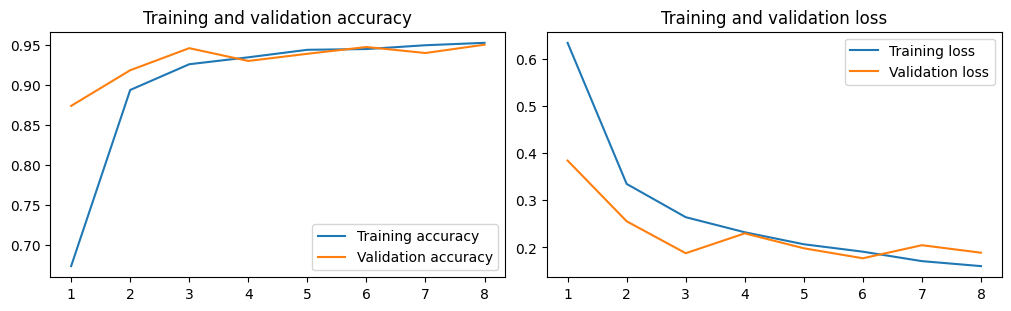

In [ ]:
plot_history(model_10)

In [ ]:
best_val_accuracy = max(model_10.history['val_accuracy'])
print("Best Validation Accuracy:", best_val_accuracy)

Best Validation Accuracy: 0.9501451849937439


### **Model 11: Decreasing Learning Rate**

As discussed above, the model benifited from a decrease from the default learning rate. So, here I have further decreased the learning rate from 0.0005 to 0.0001 to see if it would further optimise my model.

In [ ]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))  # First convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')) # Second convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001))) # Third convolutional layer with L2
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten()) # Flatten the output from the convolutional layers
model.add(tf.keras.layers.Dense(64, activation='relu')) # Fully connected layer
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Output layer

model.compile(tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy']) # Decreased learning rate

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 74, 74, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 36, 36, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 17, 17, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,183,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,207,905 (4.61 MB)

 Trainable params: 1,207,681 (4.61 MB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
model_11 = earlystopping_train_model(model, '11', 20)

Epoch 1/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6047 - loss: 0.7080
Epoch 1: val_accuracy improved from -inf to 0.57841, saving model to best_model_11.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 32s 44ms/step - accuracy: 0.6048 - loss: 0.7079 - val_accuracy: 0.5784 - val_loss: 0.7223
Epoch 2/20
602/603 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7890 - loss: 0.4667
Epoch 2: val_accuracy improved from 0.57841 to 0.91288, saving model to best_model_11.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7891 - loss: 0.4665 - val_accuracy: 0.9129 - val_loss: 0.2700
Epoch 3/20
602/603 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9018 - loss: 0.2734
Epoch 3: val_accuracy improved from 0.91288 to 0.92836, saving model to best_model_11.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 42s 38ms/step - accuracy: 0.9019 - loss: 0.2734 - val_accuracy: 0.9284 - val_loss: 0.1934
Epoch 4/20
601/603 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9276 - loss: 0.2052
Epoch 4: val_accuracy 

### **Model 11 Evaluation**

As you can see below, the further decrease of learning rate damaged the validation accuracy and also encouraged room for overfitting, the optimal learning rate investigated was shown in **Model 10** - 0.0005.

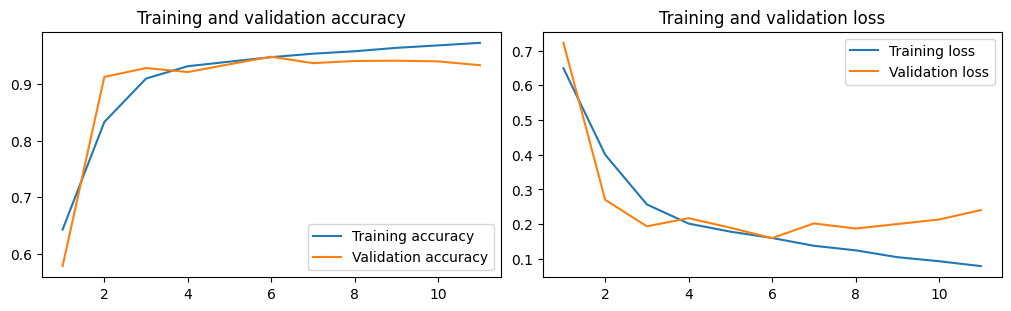

In [ ]:
plot_history(model_11)

In [ ]:
best_val_accuracy = max(model_11.history['val_accuracy'])
print("Best Validation Accuracy:", best_val_accuracy)

Best Validation Accuracy: 0.9484511017799377


### **Model 12: Data Augmentation**

Here I implement Data Augmentation to help improve the models generalization. Usually data augmentation is implemented to resolve overfitting, our model is not showing a big indication of overfitting however this implementation can help the model deal with real-world data better and make it more robust.

I have also reverted back to **Model 10's** learning rate of 0.0005.

In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.2),
    ]
)

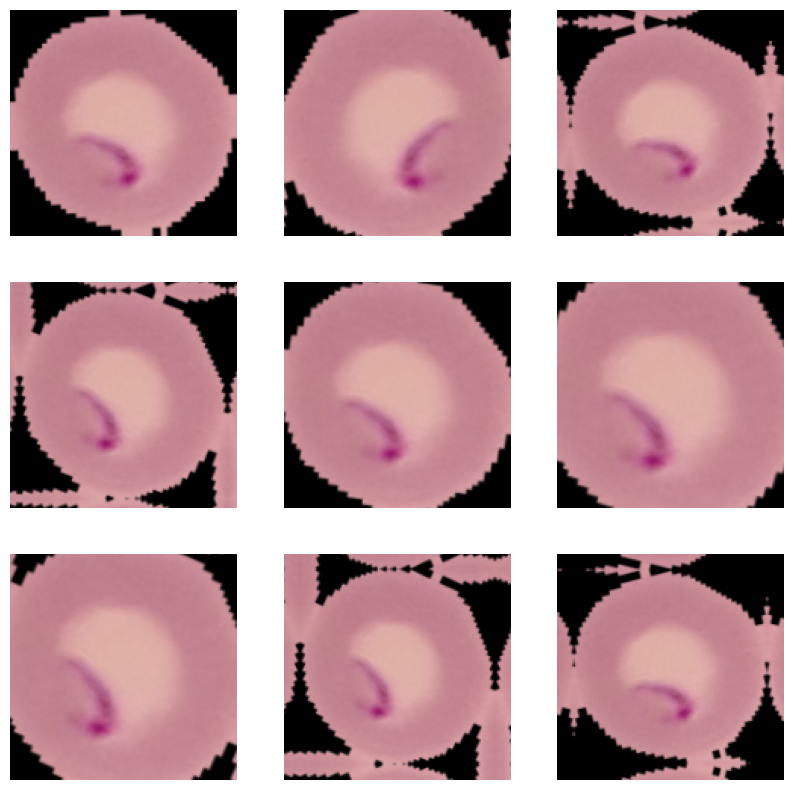

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()
model.add(data_augmentation)
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))  # First convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')) # Second convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001))) # Third convolutional layer with L2
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten()) # Flatten the output from the convolutional layers
model.add(tf.keras.layers.Dense(64, activation='relu')) # Fully connected layer
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Output layer

model.compile(tf.keras.optimizers.Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (32, 150, 150, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 148, 148, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 74, 74, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (32, 74, 74, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 72, 72, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 36, 36, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (32, 36, 36, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 34, 34, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 17, 17, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (32, 17, 17, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 18496)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │       1,183,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (32, 64)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 1)                     │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,207,905 (4.61 MB)

 Trainable params: 1,207,681 (4.61 MB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
model_12 = earlystopping_train_model(model, '12', 20)

Epoch 1/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6013 - loss: 0.7829
Epoch 1: val_accuracy improved from -inf to 0.53146, saving model to best_model_12.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 32s 43ms/step - accuracy: 0.6014 - loss: 0.7827 - val_accuracy: 0.5315 - val_loss: 1.2243
Epoch 2/20
602/603 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8068 - loss: 0.4374
Epoch 2: val_accuracy improved from 0.53146 to 0.89642, saving model to best_model_12.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.8069 - loss: 0.4372 - val_accuracy: 0.8964 - val_loss: 0.3892
Epoch 3/20
602/603 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9034 - loss: 0.2855
Epoch 3: val_accuracy improved from 0.89642 to 0.93877, saving model to best_model_12.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.9034 - loss: 0.2855 - val_accuracy: 0.9388 - val_loss: 0.2147
Epoch 4/20
601/603 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9166 - loss: 0.2641
Epoch 4: val_accuracy 

### **Model 12 Evaluation**

As you can see below, the implementation of data augmentation to impove my model actually decreased my models validation accuracy.

However reviewing it further, I see that this could possibly have been caused by the use of early stopping. Data augmentation needs a handful of epochs before showing full effect. Early stopping may have halted the process earlier than optimal. This would explain why the validation has decreased as it has not had a chance to adapt before increasing its accuracy.

This being said, the graphs show that their is minimal, if any overfitting and validation loss was decreasing.

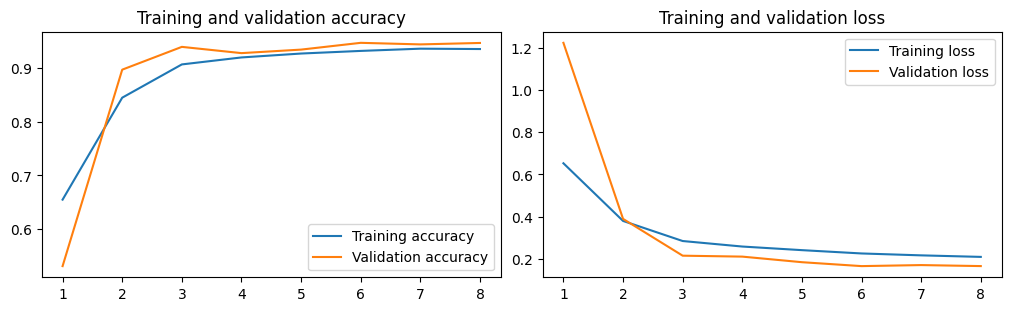

In [ ]:
plot_history(model_12)

In [ ]:
best_val_accuracy = max(model_11.history['val_accuracy'])
print("Best Validation Accuracy:", best_val_accuracy)

Best Validation Accuracy: 0.9484511017799377


### **Model 13: Data Augmentation (without early stopping)**

As discussed above, the implementation of Data Augmentation to the model needs to be tested without early stopping to understand its full potential with this model.

Here I am using my original train_model function instead of implementing early stopping and am allowing the model to train for 40 epochs.

Note that I have kept the dropout, L2 regularization and learning rate the same as **Model 10**.

In [ ]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()
model.add(data_augmentation)
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))  # First convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')) # Second convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001))) # Third convolutional layer with L2
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten()) # Flatten the output from the convolutional layers
model.add(tf.keras.layers.Dense(64, activation='relu')) # Fully connected layer
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Output layer

model.compile(tf.keras.optimizers.Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (32, 150, 150, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 148, 148, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 74, 74, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (32, 74, 74, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 72, 72, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 36, 36, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (32, 36, 36, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 34, 34, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 17, 17, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (32, 17, 17, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 18496)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │       1,183,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (32, 64)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 1)                     │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,207,905 (4.61 MB)

 Trainable params: 1,207,681 (4.61 MB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
model_13 = train_model(model, '13', 40)

Epoch 1/40
601/603 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6193 - loss: 0.7310
Epoch 1: val_accuracy improved from -inf to 0.57551, saving model to best_model/best_model_13.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.6195 - loss: 0.7306 - val_accuracy: 0.5755 - val_loss: 0.8347
Epoch 2/40
601/603 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8479 - loss: 0.3847
Epoch 2: val_accuracy improved from 0.57551 to 0.90053, saving model to best_model/best_model_13.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8480 - loss: 0.3845 - val_accuracy: 0.9005 - val_loss: 0.2633
Epoch 3/40
601/603 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9176 - loss: 0.2784
Epoch 3: val_accuracy improved from 0.90053 to 0.92836, saving model to best_model/best_model_13.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9176 - loss: 0.2784 - val_accuracy: 0.9284 - val_loss: 0.2061
Epoch 4/40
601/603 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9276 - loss

### **Model 13 Evaluation**

As expected, this model performed better without the implementaion of early stopping. At epoch 35 the model reached its peak validation accuracy at 0.962, with minimal or no overfitting present. There is minimal noise and overfitting.

This is the best validation accuracy we have seen so far.

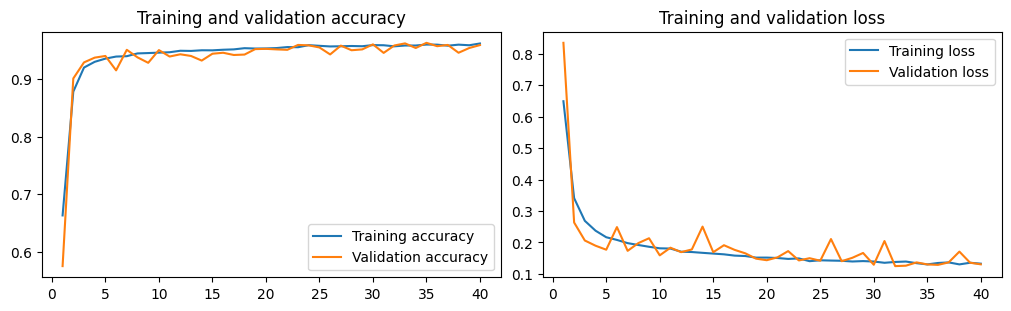

In [ ]:
plot_history(model_13)

In [ ]:
best_val_accuracy = max(model_13.history['val_accuracy'])
print("Best Validation Accuracy:", best_val_accuracy)

Best Validation Accuracy: 0.9622458815574646


### **Model 14: Using Global Pooling**

Now that we have solved overfitting and discovered a more optimal amount of epochs, I am aiming to increase the validation accuracy of the model by introducing a Global Pooling layer. This layer will condense the spacial information in the feature maps into a singular value, ensuring only the most significant value is retained, hopefully improving the models ability to generalise on unseen data. It should get rid of noise, preventing the model from learning redundant information.

The use of gloabl pooling over a flattening layer should also be computationally faster and more efficient.

In [ ]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()
model.add(data_augmentation)
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))  # First convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')) # Second convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001))) # Third convolutional layer with L2
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.GlobalAveragePooling2D())

model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Output layer

model.compile(tf.keras.optimizers.Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (32, 150, 150, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 148, 148, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 74, 74, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (32, 74, 74, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 72, 72, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 36, 36, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (32, 36, 36, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 34, 34, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 17, 17, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (32, 17, 17, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (32, 64)                    │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (32, 64)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 1)                     │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,257 (110.38 KB)

 Trainable params: 28,033 (109.50 KB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
model_14 = train_model(model, '14', 40)

Epoch 1/40
601/603 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7091 - loss: 0.5750
Epoch 1: val_accuracy improved from -inf to 0.75194, saving model to best_model/best_model_14.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 32s 46ms/step - accuracy: 0.7095 - loss: 0.5745 - val_accuracy: 0.7519 - val_loss: 0.4331
Epoch 2/40
602/603 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9124 - loss: 0.2530
Epoch 2: val_accuracy improved from 0.75194 to 0.90682, saving model to best_model/best_model_14.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 38s 42ms/step - accuracy: 0.9124 - loss: 0.2530 - val_accuracy: 0.9068 - val_loss: 0.2644
Epoch 3/40
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9290 - loss: 0.2161
Epoch 3: val_accuracy improved from 0.90682 to 0.92135, saving model to best_model/best_model_14.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.9290 - loss: 0.2161 - val_accuracy: 0.9213 - val_loss: 0.2333
Epoch 4/40
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9331 - lo

### **Model 14 Evaluation**

The use of global pooling in this model slightly decreased the models validation accuracy compared to **Model 13**. It reached its highest validation accuracy at epoch 38, similar to **Model 13**.

This compression in the feature maps might have been to aggressive for my relatively large feature maps in this model. Causing my model to lose important information (spacial location).

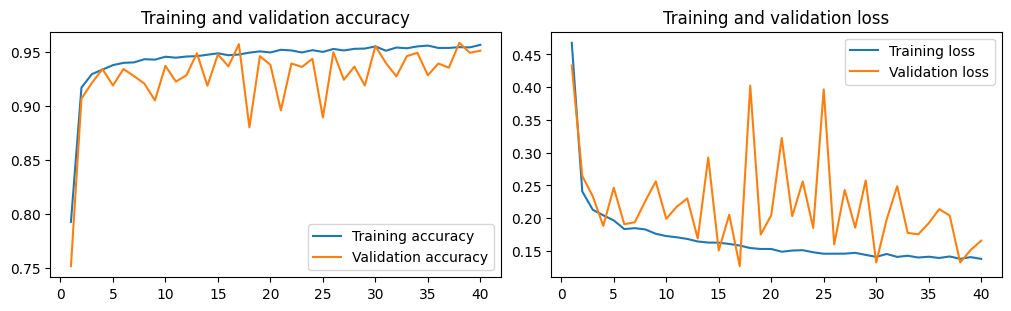

In [ ]:
plot_history(model_14)

In [ ]:
best_val_accuracy = max(model_14.history['val_accuracy'])
print("Best Validation Accuracy:", best_val_accuracy)

Best Validation Accuracy: 0.9583736658096313


## **8 Leveraging a Pretrained Model**

### **VGG16**

Here I explore the use of the pretrained model VGG16. It is more complex than my 'models from scratch', with 13 convolutional layers and 3 fully connected layers. It is one of the most popular algorithms for image classification and goes hand in hand with transfer learning.

As shown in class and in DWLP, I used the model as a feature extractor and then added a new model on top for classification.

### Feature Extraction (No Data Augmentation)

Extract THEN train




Initiating base

In [ ]:
tf.keras.backend.clear_session()

conv_base = tf.keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Extracting features and labels

In [ ]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset: # ← LOOP THROUGH THE ENTIRE DATASET
        preprocessed_images = tf.keras.applications.vgg16.preprocess_input(images) # preprocess the images
        features = conv_base.predict(preprocessed_images, verbose=0)               # run the images through the model
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

# our feature datasets
train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

In [ ]:
train_features.shape # the shape of the current features: `(samples, 4, 4, 512)`

(19290, 4, 4, 512)

Defining and then training classifier.

In [ ]:
tf.keras.backend.clear_session()

inputs = tf.keras.Input(shape=(4, 4, 512))
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(256)(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
      filepath= str("feature_extraction.keras"),
      save_best_only=True,
      monitor="val_loss")
]

history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

del model

Epoch 1/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8425 - loss: 18.9034 - val_accuracy: 0.9366 - val_loss: 1.4616
Epoch 2/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9080 - loss: 1.3402 - val_accuracy: 0.9293 - val_loss: 0.2782
Epoch 3/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9129 - loss: 0.5401 - val_accuracy: 0.9245 - val_loss: 0.3519
Epoch 4/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9183 - loss: 0.5475 - val_accuracy: 0.8959 - val_loss: 0.5825
Epoch 5/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9195 - loss: 0.5613 - val_accuracy: 0.9405 - val_loss: 0.6082
Epoch 6/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9251 - loss: 0.6031 - val_accuracy: 0.8647 - val_loss: 1.0064
Epoch 7/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9251 - loss: 0.6130 - val_accuracy: 0.9189 - val_loss: 0.6686
Epoch 8/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9325 - loss: 0.5793 - val_accuracy: 0

### **Feature Extraction Evaluation (No Data Augmentation)**

Here you can see we obtained a 0.944 validation accuracy with minimal overfitting. This is about the expected accuracy for this pretrained model on a dataset this size.

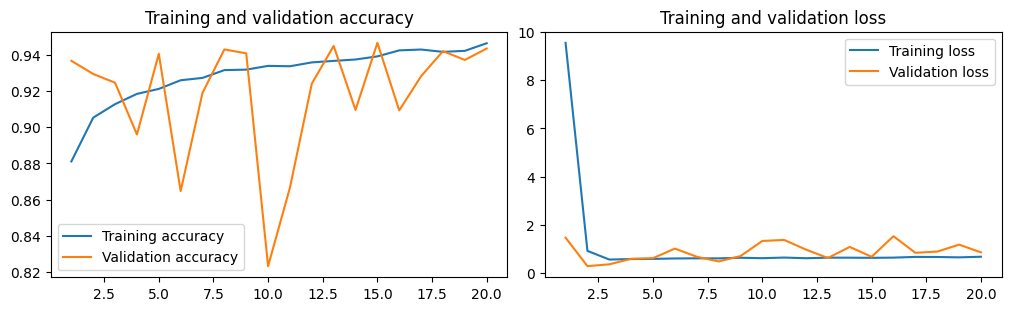

In [ ]:
plot_history(history)

In [ ]:
best_val_accuracy = max(history.history['val_accuracy'])
print("Best Validation Accuracy:", best_val_accuracy)

Best Validation Accuracy: 0.9465150237083435


### Feature Extraction (With Data Augmentation)

Freeze AND Train



Initiate and freeze the base.

In [ ]:
tf.keras.backend.clear_session()

conv_base  = tf.keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False
)
conv_base.trainable = False # ← FREEZE THE BASE

Trainable weights before freezing.

In [ ]:
conv_base.trainable = True
print("Number of trainable weights before freezing the conv base:", len(conv_base.trainable_weights))

Number of trainable weights before freezing the conv base: 26


Trainable weights after freezing.

In [ ]:
conv_base.trainable = False
print("Number of trainable weights after freezing the conv base:", len(conv_base.trainable_weights))

Number of trainable weights after freezing the conv base: 0


Adding a data augmentation stage and a classifier to the convolutional base.

In [ ]:
inputs = tf.keras.Input(shape=(150, 150, 3))
#   ↓ our processed inputs
x = data_augmentation(inputs)
#   ↓ VGG16-specific processing (scales inputs to appropriate range)
x = tf.keras.applications.vgg16.preprocess_input(x)
#   ↓ OUR FROZEN VGG BASE
x = conv_base(x)

#   ↓ the rest of our net
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256)(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(inputs, outputs) #  finalise model by giving the inputs & outputs

model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 150, 150, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_1 (Sequential) │ (None, 150, 150, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (None, 150, 150)       │              0 │ sequential_1[182][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (None, 150, 150)       │              0 │ sequential_1[182][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (None, 150, 150)       │              0 │ sequential_1[182][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack (Stack)             │ (None, 150, 150, 3)    │              0 │ get_item[0][0],        │
│                           │                        │                │ get_item_1[0][0],      │
│                           │                        │                │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 150, 150, 3)    │              0 │ stack[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg16 (Functional)        │ (None, 4, 4, 512)      │     14,714,688 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 8192)           │              0 │ vgg16[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 256)            │      2,097,408 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 256)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │            257 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath= str("feature_extraction_with_data_augmentation.keras"),
        save_best_only=True,
        monitor="val_loss"
    )
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/50
603/603 ━━━━━━━━━━━━━━━━━━━━ 67s 105ms/step - accuracy: 0.8336 - loss: 15.8560 - val_accuracy: 0.9078 - val_loss: 1.3879
Epoch 2/50
603/603 ━━━━━━━━━━━━━━━━━━━━ 77s 101ms/step - accuracy: 0.8859 - loss: 0.8575 - val_accuracy: 0.7856 - val_loss: 0.9705
Epoch 3/50
603/603 ━━━━━━━━━━━━━━━━━━━━ 81s 101ms/step - accuracy: 0.8872 - loss: 0.5445 - val_accuracy: 0.9025 - val_loss: 0.5875
Epoch 4/50
603/603 ━━━━━━━━━━━━━━━━━━━━ 81s 100ms/step - accuracy: 0.8955 - loss: 0.5586 - val_accuracy: 0.7081 - val_loss: 1.4508
Epoch 5/50
603/603 ━━━━━━━━━━━━━━━━━━━━ 60s 99ms/step - accuracy: 0.9003 - loss: 0.5859 - val_accuracy: 0.9180 - val_loss: 0.6193
Epoch 6/50
603/603 ━━━━━━━━━━━━━━━━━━━━ 60s 100ms/step - accuracy: 0.9022 - loss: 0.5826 - val_accuracy: 0.9373 - val_loss: 0.3475
Epoch 7/50
603/603 ━━━━━━━━━━━━━━━━━━━━ 82s 100ms/step - accuracy: 0.8972 - loss: 0.6281 - val_accuracy: 0.9126 - val_loss: 0.6045
Epoch 8/50
603/603 ━━━━━━━━━━━━━━━━━━━━ 61s 101ms/step - accuracy: 0.8988 - loss: 0

### **Feature Extraction Evaluation (Data Augmentation)**

Because of the complexity of this pretrained model, it took significantly longer to run. In the end we see a fluctuation between 0.7 and 0.9 validation accuracy.

The models validation metrics suggest the model is overfitting as training accuracy is high but validation accuracy is poorer. Validation loss also increases over time with training loss decreasing over time.

The addition of early stopping, higher dropout and a learning rate scheduler might improve the current model with my dataset.

It is also possible that this model is just too complex for my binary classification task.

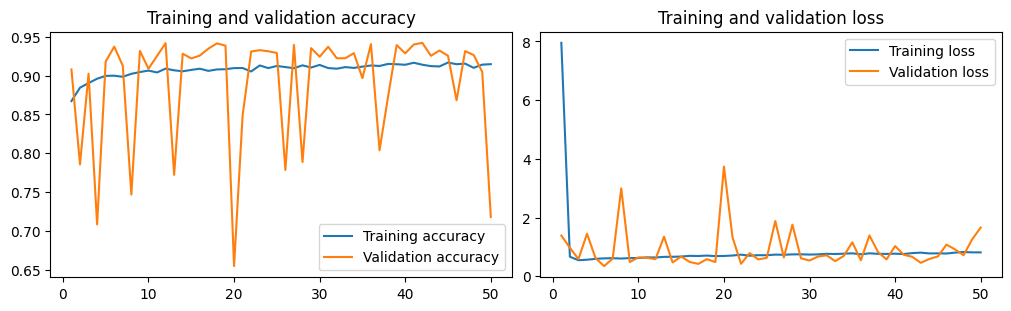

In [ ]:
plot_history(history)

In [ ]:
best_val_accuracy = max(history.history['val_accuracy'])
print("Best Validation Accuracy:", best_val_accuracy)

Best Validation Accuracy: 0.9421587586402893


## **9 Training and Testing the Best Model**

When considering which of the models in this investigation is the best I must think about the combination of validation accuracy and validation loss. Generally I am looking for the model with the highest validation accuracy and the lowest validation loss.

Two main models stand out:
* Model 7 has a high validation accuracy - 0.955469 and a low validation loss - 0.144642
* Model 13 also has very high validation accuracy - 0.9632 and a low validation loss - 0.110972

For the evaluation of the best model I will be using model 13: Data Augmentation (without early stopping)

In [ ]:
# modified code from ChatGPT (4o, free version, 21/01/2025)

# Model names
model_names = [f"model_{i}" for i in range(1, 15)]  # List of model names from model_1 to model_14
models_data = []

# For each model
for i in range(1, 15):
    model_name = f"model_{i}"

    model = globals()[model_name]

    history = model.history  # Get the history of the trained model

    train_acc = max(history['accuracy'])  # Max training accuracy
    val_acc = max(history['val_accuracy'])  # Max validation accuracy
    val_loss = min(history['val_loss'])  # Min validation loss

    # Append the data to the list
    models_data.append({
        "Model": model_name,
        "Train Accuracy": train_acc,
        "Val Accuracy": val_acc,
        "Val Loss": val_loss
    })

# Convert the data to df
df = pd.DataFrame(models_data)

print(df)


       Model  Train Accuracy  Val Accuracy  Val Loss
0    model_1        0.949611      0.882623  0.382988
1    model_2        0.742094      0.666989  0.662525
2    model_3        0.979264      0.941191  0.195643
3    model_4        0.993883      0.949903  0.164432
4    model_5        0.983256      0.950387  0.170419
5    model_6        0.980767      0.951597  0.167983
6    model_7        0.980145      0.955469  0.144642
7    model_8        0.961068      0.954501  0.151000
8    model_9        0.955417      0.949903  0.164845
9   model_10        0.952462      0.950145  0.177067
10  model_11        0.972991      0.948451  0.159395
11  model_12        0.935407      0.946273  0.165173
12  model_13        0.957750      0.963214  0.110972
13  model_14        0.956506      0.958374  0.126726


### Evaluating the best model on the test dataset

In [ ]:
best_model = tf.keras.models.load_model(f'best_model/best_model_13.keras')
test_loss, test_accuracy = best_model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9649 - loss: 0.1012
Test Loss: 0.11377568542957306
Test Accuracy: 0.9632495045661926


* Training Accuracy: 96.22%
* Testing Accuracy: 96.32%

Test accuracy is very close to training accuracy. The model is generalising well to the test data and has minimal overfitting. The test loss is also reletively low meaning **Model 13's** predictions are fairly accurate for the binary classification task of detecting malaria infected cells from images.

# Confusion Matrix for Best Model

As you can see below, **Model 13** has achieved high accuracy, recall, specifity and F1 score. These similar, balanced scores assure me the model is perfrming well.

* True Negatives = 1974: Uninfected cases that were correctly identified as uninfected by **Model 13**.
* False Positives = 94: Uninfected cases that were incorrectly classified as parasitized by **Model 13**.
* False Negatives = 58: Parasitized cases that were incorrectly classified as uninfected by **Model 13**.
* True Positives = 2010: Parasitized cases that were correctly identified as parasitized by **Model 13**.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

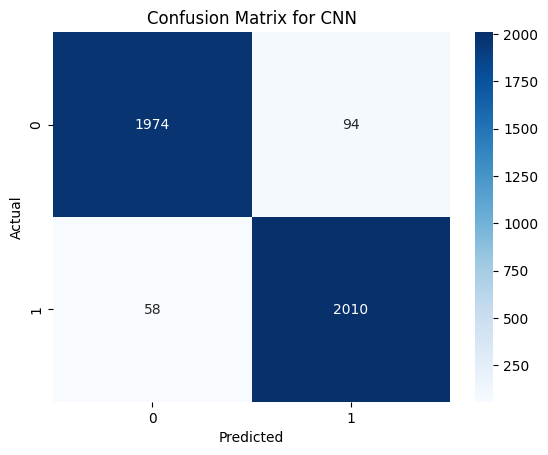

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Store true labels and predicted labels
y_true = []
y_pred_classes = []

for images, labels in test_dataset:
    y_true.append(labels.numpy())
    y_pred = best_model.predict(images)
    y_pred_classes.append((y_pred > 0.5).astype(int))

y_true = np.concatenate(y_true)
y_pred_classes = np.concatenate(y_pred_classes)

y_true = y_true.flatten()
y_pred_classes = y_pred_classes.flatten()

confusion_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for CNN')
plt.show()


In [ ]:
tn, fp, fn, tp = confusion_matrix.ravel()

accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes)
recall = recall_score(y_true, y_pred_classes)
specificity = tn / (tn + fp)
f1 = f1_score(y_true, y_pred_classes)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9632
Precision: 0.9553
Recall (Sensitivity): 0.9720
Specificity: 0.9545
F1 Score: 0.9636


## **10 Conclusion**

In conclusion, I have successfully implemented many deep learning techniques from Deep Learning with Python to address the binary classification task of detecting malaria infected cells. I addressed issues and iteratively built on my model.

Starting with the baseline, I built up the model to improve its validation accuracy and decrease its validation loss. This included exploring regularization techniques, hyperparameter tuning, and experimenting with different model configurations.

I explored the use of pretrained models through the model VGG16 that is outlined in DLWP and achieved a 94% validation accuracy.

Below is the final best model structure (**Model 13**), its optimal epoch was epoch 35 out of the 40 epochs it was ran for and its test accuracy was 96.32%.

In [ ]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()
model.add(data_augmentation)
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))  # First convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')) # Second convolutional layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001))) # Third convolutional layer with L2
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten()) # Flatten the output from the convolutional layers
model.add(tf.keras.layers.Dense(64, activation='relu')) # Fully connected layer
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Output layer

# Compile the model
model.compile(tf.keras.optimizers.Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy']) # Decreased learning rate

# Summary of the model architecture
model.summary()

## References


*  Jérémie Wenger
  *  [8.introduction-to-convnets (2024)](https://drive.google.com/file/d/11y1ArxRvAbd0FM9lXog0j21RSYwAQeVu/view?usp=sharing)
  * [7.,13. Keras Deep Dive (2024)](https://drive.google.com/file/d/14ke5rzlxXaC-y0L9yZl881LYcT9SgbeP/view?usp=sharing)
  * [9.3 Modern ConvNet Architecture Patterns](https://drive.google.com/file/d/14h_gTbrxwvZBJ64Ov6msYTCKUYb7arl6/view?usp=sharing)
*  Francois Chollet Deep Learning With Python (2021)
* [Coursework example - Brain Tumour Classification ](https://learn.gold.ac.uk/mod/folder/view.php?id=1589570)
*  [Kaggle - Cell Images for Detecting Malaria](www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria)
*  [VGG16 Pretrained Model](https://keras.io/api/applications/vgg/)

In [ ]:
#saving notebook as html
%%shell
jupyter nbconvert --to html '/content/malaria_image_classification (11).ipynb'

[NbConvertApp] Converting notebook /content/malaria_image_classification (11).ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 19 image(s).
[NbConvertApp] Writing 2833140 bytes to /content/malaria_image_classification (11).html


In [ ]:
!wc -l /content/malaria_image_classification.py

1231 /content/malaria_image_classification.py
